In [502]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
# import xgboost as xgb
from sklearn.metrics import mean_squared_error as MSE


In [503]:
raw_df = pd.read_csv("thyroid_cancer_risk_data.csv")
raw_df.head()

,Patient_ID,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Diagnosis
0,1,66,Male,Russia,Caucasian,No,Yes,No,No,No,No,9.37,1.67,6.16,1.08,Low,Benign
1,2,29,Male,Germany,Hispanic,No,Yes,No,No,No,No,1.83,1.73,10.54,4.05,Low,Benign
2,3,86,Male,Nigeria,Caucasian,No,No,No,No,No,No,6.26,2.59,10.57,4.61,Low,Benign
3,4,75,Female,India,Asian,No,No,No,No,No,No,4.10,2.62,11.04,2.46,Medium,Benign
4,5,35,Female,Germany,African,Yes,Yes,No,No,No,No,9.10,2.11,10.71,2.11,High,Benign


In [504]:
df = raw_df.copy()

yes_no_cols = ["Family_History",
"Radiation_Exposure",
"Iodine_Deficiency",
"Smoking",
"Obesity",
"Diabetes"]

for col in yes_no_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df['Thyroid_Cancer_Risk'] = df['Thyroid_Cancer_Risk'].map({'Low': 0, 'Medium': 1, 'High': 2})
df['Diagnosis'] = df['Diagnosis'].map({'Benign': 0, 'Malignant': 1})

# df = pd.get_dummies(df, dtype=int)

cols_to_drop = [
    # "Age",
    # "Gender",
    "Country",
    "Ethnicity",
    # "Family_History",
    # "Radiation_Exposure",
    # "Iodine_Deficiency",
    # "Smoking",
    # "Obesity",
    # "Diabetes",
    # "TSH_Level",
    # "T3_Level",
    # "T4_Level",
    # "Nodule_Size",


]

df = df.drop(cols_to_drop, axis=1)

df.head()

,Patient_ID,Age,Gender,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Diagnosis
0,1,66,0,0,1,0,0,0,0,9.37,1.67,6.16,1.08,0,0
1,2,29,0,0,1,0,0,0,0,1.83,1.73,10.54,4.05,0,0
2,3,86,0,0,0,0,0,0,0,6.26,2.59,10.57,4.61,0,0
3,4,75,1,0,0,0,0,0,0,4.10,2.62,11.04,2.46,1,0
4,5,35,1,1,1,0,0,0,0,9.10,2.11,10.71,2.11,2,0


In [505]:
target_variable, target_index = 'Diagnosis', ['Benign', 'Malignant']
# target_variable, target_index = 'Thyroid_Cancer_Risk', ['Low', 'Middle', 'High']


X = df.drop(['Patient_ID', target_variable], axis=1)
y = df[target_variable]

X.head()

,Age,Gender,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk
0,66,0,0,1,0,0,0,0,9.37,1.67,6.16,1.08,0
1,29,0,0,1,0,0,0,0,1.83,1.73,10.54,4.05,0
2,86,0,0,0,0,0,0,0,6.26,2.59,10.57,4.61,0
3,75,1,0,0,0,0,0,0,4.10,2.62,11.04,2.46,1
4,35,1,1,1,0,0,0,0,9.10,2.11,10.71,2.11,2


In [506]:
X_train, X_test, y_train, y_test= train_test_split(X, y,test_size=0.2,random_state=99)

clf = DecisionTreeClassifier(criterion='gini', random_state=99, max_depth=3)
clf.fit(X_train,y_train)
y_pred= clf.predict(X_test)


In [507]:
accuracy_df = pd.DataFrame(index=target_index, columns=['Actual', 'Predicted'])

def get_cat_pct(y):
    value_counts = y.value_counts()
    # print(type(value_counts))
    # print(value_counts)
    counts = []
    for i in range(len(target_index)):
        # print(i)

        # print(value_counts.get(i,0))
        counts.append(np.round((value_counts.get(i,0)/len(y))*100, 2))

    return counts

# print(y_test.values)
# print(type(y_test.values))
# print(type(y_pred))
accuracy_df['Actual'] = get_cat_pct(y_test)
accuracy_df['Predicted'] = get_cat_pct(pd.Series(y_pred))

print(get_cat_pct(y_train))

accuracy_df

[76.75, 23.25]


,Actual,Predicted
Benign,76.64,85.03
Malignant,23.36,14.97


<Axes: >

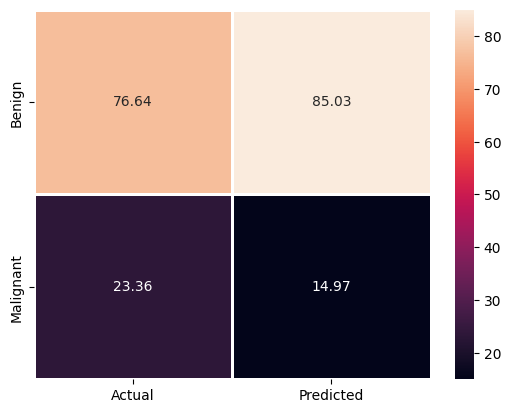

In [508]:

sns.heatmap(accuracy_df, annot=True, fmt=".2f", linewidth=1)

In [509]:

accuracy_score(y_test, y_pred)

0.8270763299560403

In [510]:
accuracy = float(np.sum(y_pred==y_test))/y_test.shape[0]
accuracy

0.8270763299560403

In [511]:
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


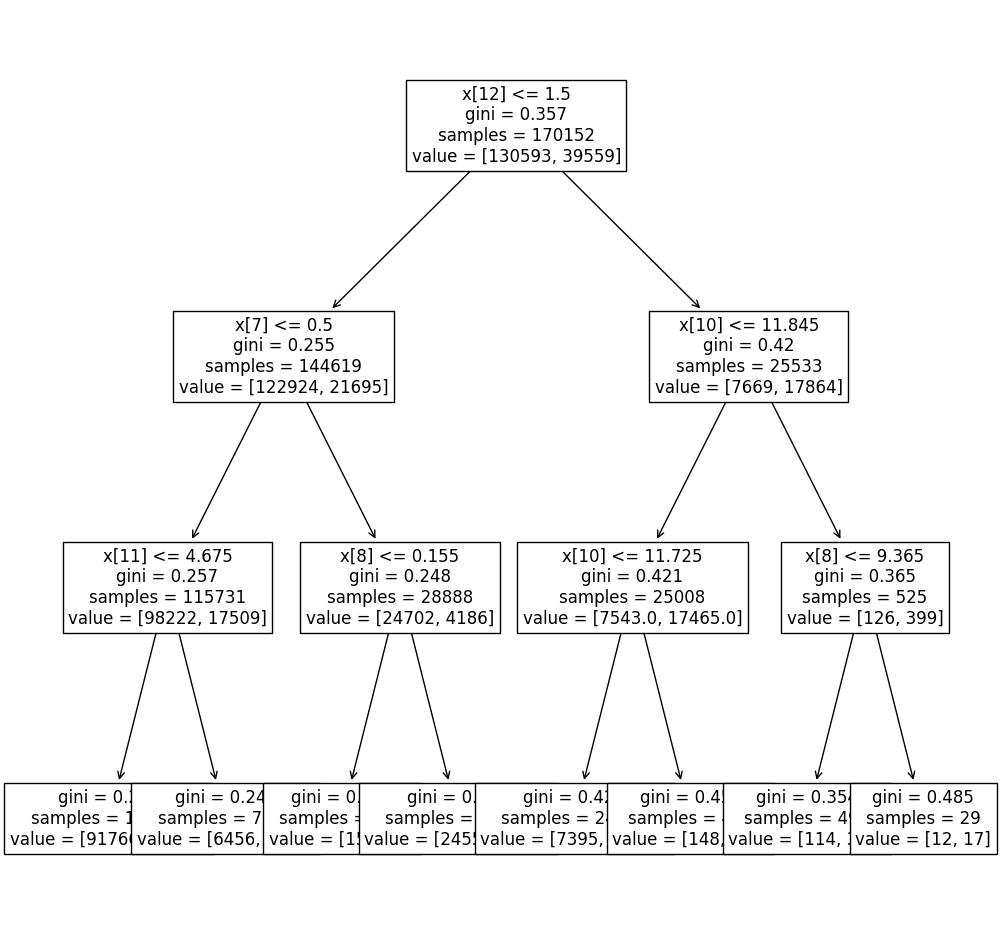

In [512]:

fig, ax = plt.subplots(figsize=(12, 12))
tree.plot_tree(decision_tree=clf, max_depth=3,fontsize=12);

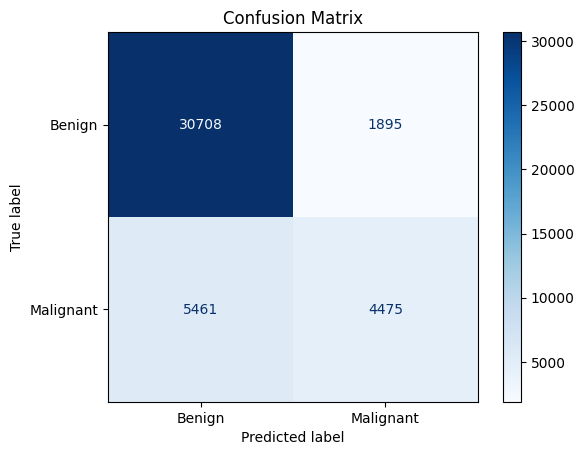

In [513]:
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_index)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()